# Udemy ML Final Project

In [1]:
# import packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import IPython
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
from sklearn import preprocessing
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, scorer, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from patsy import dmatrices

%matplotlib inline
sns.set(color_codes=True)

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



# Part 1.EDA

In [2]:
udemy_data = pd.read_csv("udemy_courses.csv")

## Clean Data: check data type and fill NA

In [3]:
#Checking the data types
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 25 columns):
course_id                  1019 non-null int64
relevancy_rank             1019 non-null int64
course_title               1019 non-null object
course_keyword             1019 non-null int64
course_url                 1019 non-null object
rating_score               1019 non-null float64
label                      1019 non-null object
num_people_rated           1019 non-null int64
enrolled_students          1019 non-null int64
language                   1019 non-null object
caption                    819 non-null object
caption_exist              1019 non-null int64
price                      1019 non-null float64
currency                   948 non-null object
video_hour                 1019 non-null float64
article_number             1019 non-null int64
lecture_number             1019 non-null int64
resource_number            1019 non-null int64
instructor_number          1019 non-n

In [4]:
#changing data types

# Price - Dollars to cents
udemy_data['price'] = (udemy_data['price']*100).astype(int)
udemy_data['currency'] = 'Cents'

# Video hour - converting hours to minutes
udemy_data['video_hour'] = (udemy_data['video_hour']*60).astype(int)

# Update_date: convert update_date to datetime, then to integer: days between last updated date and now
udemy_data['update_date'] = pd.to_datetime(udemy_data['update_date'])
date = udemy_data['update_date']
for i in range(len(date)):
    date[i] = int(str(datetime.datetime.now() - date[i]).split(' ')[0])
udemy_data[["update_date"]] = udemy_data[["update_date"]].astype(int)

In [5]:
#checking for duplicate rows
duplicate_rows = udemy_data[udemy_data.duplicated()]
print("There are no duplicate values : ", duplicate_rows.shape)

There are no duplicate values :  (0, 25)


In [6]:
#checking for null values
udemy_data.isnull().sum()

course_id                    0
relevancy_rank               0
course_title                 0
course_keyword               0
course_url                   0
rating_score                 0
label                        0
num_people_rated             0
enrolled_students            0
language                     0
caption                    200
caption_exist                0
price                        0
currency                     0
video_hour                   0
article_number               0
lecture_number               0
resource_number              0
instructor_number            0
avg_student                  0
avg_course                   0
avg_review                   0
is_practice_test_course      0
update_date                  0
relevancy_score              0
dtype: int64

In [7]:
#updating the caption to 'none'
udemy_data['caption'].fillna("No caption", inplace = True)

In [8]:
#checking for null values again
print(udemy_data.isnull().sum())
print("The Missing values & NA's have been corrected")

course_id                  0
relevancy_rank             0
course_title               0
course_keyword             0
course_url                 0
rating_score               0
label                      0
num_people_rated           0
enrolled_students          0
language                   0
caption                    0
caption_exist              0
price                      0
currency                   0
video_hour                 0
article_number             0
lecture_number             0
resource_number            0
instructor_number          0
avg_student                0
avg_course                 0
avg_review                 0
is_practice_test_course    0
update_date                0
relevancy_score            0
dtype: int64
The Missing values & NA's have been corrected


In [9]:
udemy_data.describe()

,course_id,relevancy_rank,course_keyword,rating_score,num_people_rated,enrolled_students,caption_exist,price,video_hour,article_number,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,is_practice_test_course,update_date,relevancy_score
count,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,1.734304e+06,510.000000,0.508342,3.707458,454.627085,3482.010795,0.803729,9251.535819,289.153091,3.273798,44.615309,9.917566,1.167812,8.221905e+04,250.642591,16596.489418,0.008832,494.879293,87.954933
std,7.329054e+05,294.304264,0.500176,1.274220,2625.188610,13093.230320,0.397371,7124.062842,360.960980,10.229134,48.693452,26.314351,0.567890,1.733785e+05,714.529657,46701.215057,0.093610,503.813005,41.100030
min,1.671500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,13.000000,1.000000
25%,1.224393e+06,255.500000,0.000000,3.600000,5.500000,54.000000,1.000000,1998.000000,90.000000,0.000000,18.000000,0.000000,1.000000,1.825000e+03,3.000000,115.500000,0.000000,104.000000,100.030915
50%,1.812394e+06,510.000000,1.000000,4.100000,29.000000,479.000000,1.000000,8499.000000,180.000000,0.000000,31.000000,2.000000,1.000000,1.231700e+04,9.000000,908.000000,0.000000,348.000000,110.000900
75%,2.362649e+06,764.500000,1.000000,4.500000,147.000000,2472.000000,1.000000,15999.000000,330.000000,2.000000,55.000000,9.000000,1.000000,7.399000e+04,35.000000,6721.000000,0.000000,713.000000,110.007270
max,2.833006e+06,1019.000000,1.000000,5.000000,54078.000000,220534.000000,1.000000,19999.000000,4050.000000,154.000000,562.000000,530.000000,6.000000,1.543651e+06,2451.000000,475822.000000,1.000000,2598.000000,110.995476


## Visualize Data

### Course Keyword

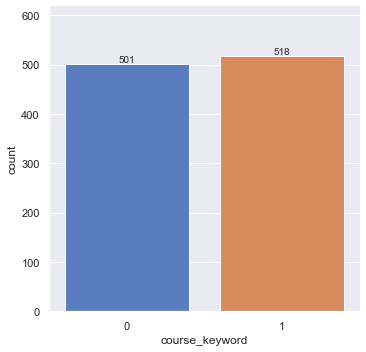

In [10]:
# course keyword

ax = sns.catplot(x = 'course_keyword', palette = "muted", kind = "count", data = udemy_data)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy_data.course_keyword.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

plt.show()

### Rating Score

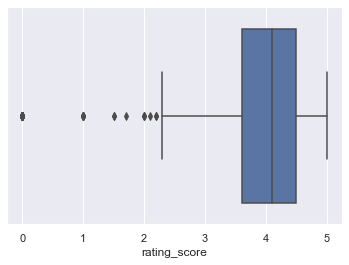

In [11]:
# rating score
sns.boxplot(x = udemy_data['rating_score'])

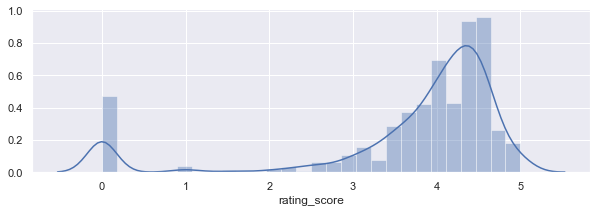

In [12]:
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.rating_score)

In [13]:
q1 = udemy_data['rating_score'].quantile(0.25)
q2 = udemy_data['rating_score'].quantile(0.75)
print("50% of the courses were rated in the range of "+str(q1)+" and "+str(q2))

50% of the courses were rated in the range of 3.6 and 4.5


In [14]:
udemy_rating1 = udemy_data[udemy_data['rating_score'] == 5]
udemy_rating1 = udemy_rating1.sort_values(by = ['enrolled_students'],ascending = False).head(2)
print("The top two courses with rating 5 are :")
for x in udemy_rating1['course_title']:
    print(x)

The top two courses with rating 5 are :
Pitch Location Charts with PITCHf/x and ggplot
The Complete MySQL Bootcamp: From SQL Beginner to Expert


In [15]:
# courses with no rating score
udemy_rating2 = udemy_data[udemy_data['rating_score'] == 0]
print("The number of courses for which people have not rated is", udemy_rating2['num_people_rated'].count())

# courses with no rating score and more than 100 enrolled students
udemy_rating3 = udemy_rating2[udemy_rating2['enrolled_students'] > 100]
print("\nThe courses for which there was no rating but more than 100 people have registered are:")
for x in udemy_rating3['course_title']:
    print(x)
print("The above courses are new courses hence they have students enrolled but no ratings \n")

# courses with no rating score and no enrolled students
udemy_rating4 = udemy_data[udemy_data['enrolled_students'] == 0]
print("The below courses did not have any students enrolled ")
for x in udemy_rating4['course_title']:
    print(x)

The number of courses for which people have not rated is 86

The courses for which there was no rating but more than 100 people have registered are:
Learn & Apply the CAGE - Business Analysis Tool
Introduction to Artificial Intelligence (AI for All)
Learn & Apply the P.E.S.T.L.E Business Analysis Tool
Learn & Apply the Multi-Criteria Business Analysis Tool
Business Statistic untuk Pemula
The above courses are new courses hence they have students enrolled but no ratings 

The below courses did not have any students enrolled 
Master MS Excel in 8 Easy Lessons
Artificial Intelligence Interview Questions & Answers
Analytics with Excel - Excel Basics
Microsoft Excel - From Start to Finish
Analyzing data through Tableau
Data Awareness
Controlling im eCommerce
Dashboards, Storys & Datenupload - Cognos Analytics 11.0.13
Curso de Power BI - básico


### Number of Students Who Rated the Course

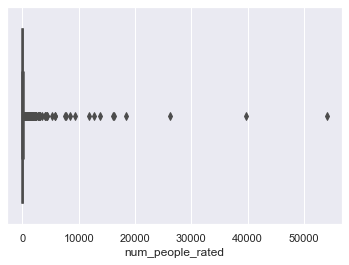

In [16]:
#number of students who rated the course
sns.boxplot(x = udemy_data['num_people_rated'])

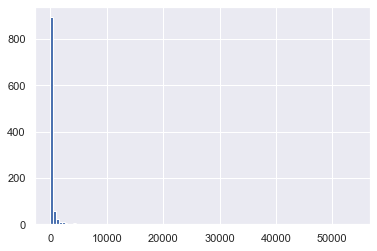

In [17]:
people_bin = np.arange(udemy_data['num_people_rated'].min(), udemy_data['num_people_rated'].max(), 500)
plt.hist(udemy_data['num_people_rated'], bins = people_bin)
plt.show()

In [18]:
udemy_people_rated = udemy_data[udemy_data['num_people_rated'] > 15000]
print("The courses which have more than 150000 students rated are:")
udemy_people_rated[['relevancy_rank','course_title']]

The courses which have more than 150000 students rated are:


,relevancy_rank,course_title
0,1,The Complete SQL Bootcamp
1,2,Tableau 10 A-Z: Hands-On Tableau Training For ...
2,3,Microsoft Power BI - A Complete Introduction
3,4,The Ultimate Hands-On Hadoop - Tame your Big D...
4,5,Business Analysis Fundamentals
746,747,Deep Learning Prerequisites: The Numpy Stack i...


### Number of Enrolled Students

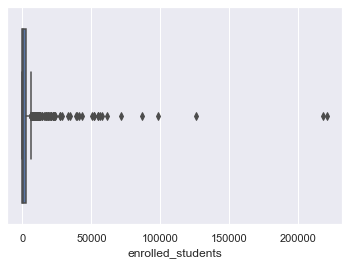

In [19]:
# number of students enrolled
sns.boxplot(x = udemy_data['enrolled_students'])

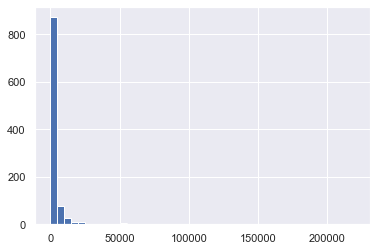

In [20]:
student_bin = np.arange(udemy_data['enrolled_students'].min(), udemy_data['enrolled_students'].max(), 5000)
plt.hist(udemy_data['enrolled_students'], bins = student_bin)
plt.show()

In [21]:
udemy_new = udemy_data[udemy_data['enrolled_students'] > 90000]
print("The courses which have more than 90,000 students enrolled are:")
udemy_new[['relevancy_rank','course_title']]

The courses which have more than 90,000 students enrolled are:


,relevancy_rank,course_title
0,1,The Complete SQL Bootcamp
1,2,Tableau 10 A-Z: Hands-On Tableau Training For ...
3,4,The Ultimate Hands-On Hadoop - Tame your Big D...
746,747,Deep Learning Prerequisites: The Numpy Stack i...


In [22]:
print("The above mentioned courses are the top 4 courses. They have \n 1) High number of students enrolled for the course  \n 2) High number of students who rated the course")

The above mentioned courses are the top 4 courses. They have 
 1) High number of students enrolled for the course  
 2) High number of students who rated the course


### Caption Exist

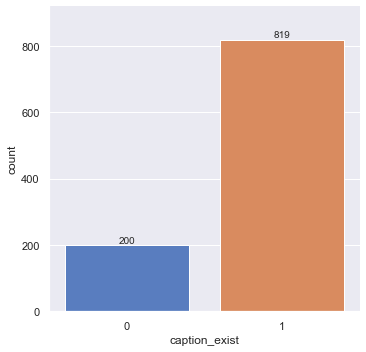

In [23]:
# caption exist

ax = sns.catplot(x = 'caption_exist', palette = "muted", kind = "count", data = udemy_data)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy_data.caption_exist.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

plt.show()

### Price

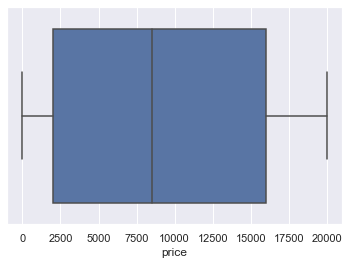

In [24]:
# price
sns.boxplot(x = udemy_data['price'])

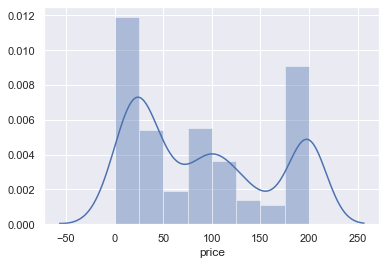

In [25]:
price = udemy_data['price']/100
sns.distplot(price)

### Video Hour

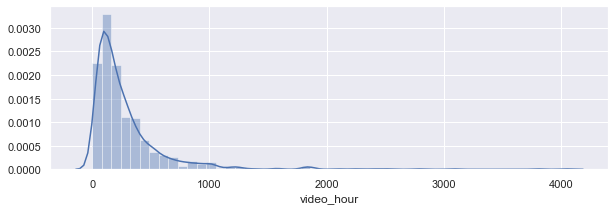

In [26]:
# video hour
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.video_hour)

### Article Number

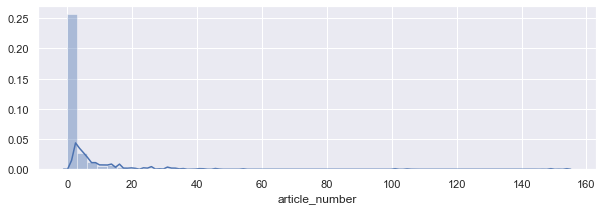

In [27]:
# article number
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.article_number)

### Lecture Number

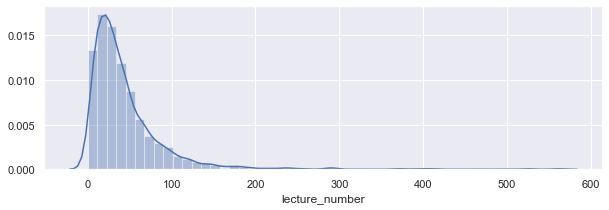

In [28]:
# lecture number
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.lecture_number)

### Resource Number

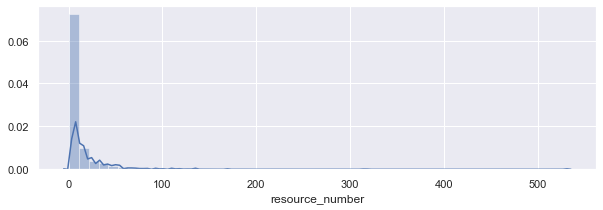

In [29]:
# resource number
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.resource_number)

### Instructor Number

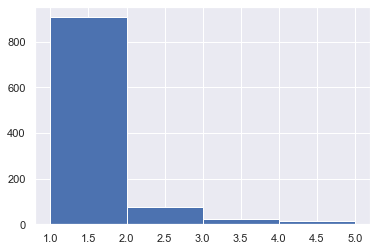

In [30]:
# instructor number
instructor_bin = np.arange(udemy_data['instructor_number'].min(), udemy_data['instructor_number'].max(), 1)
plt.hist(udemy_data['instructor_number'], bins = instructor_bin)
plt.show()

### Avg Student

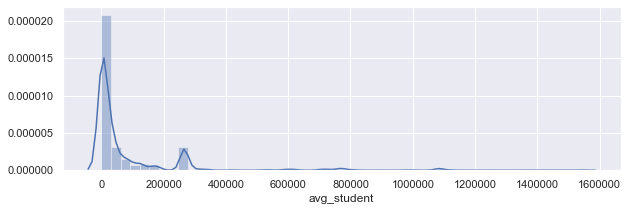

In [31]:
# avg student
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.avg_student)

### Avg Course

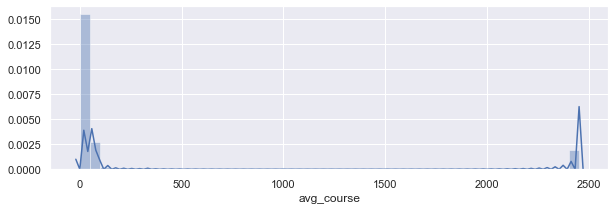

In [32]:
# avg course
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.avg_course)

### Avg Review

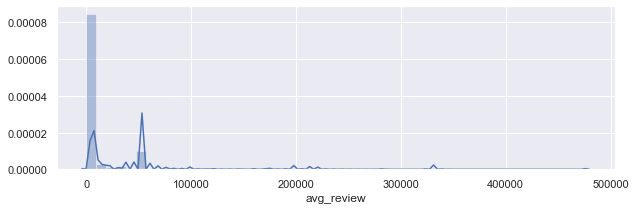

In [33]:
# avg review
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.avg_review)

### Update Date

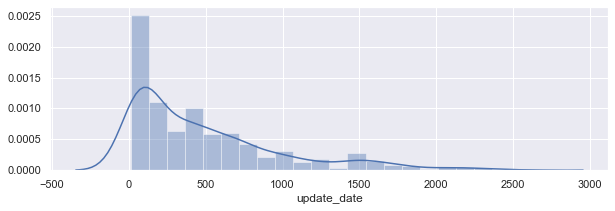

In [35]:
# update_date
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.update_date)

### Is Practice Test Course

In [36]:
# is practice test course
pd.value_counts(udemy_data['is_practice_test_course'])

0    1010
1       9
Name: is_practice_test_course, dtype: int64

### Relevancy Score

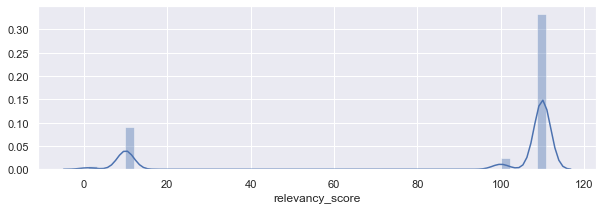

In [37]:
# relevancy score
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.relevancy_score)

### Label

In [38]:
# label
pd.value_counts(udemy_data['label'])

Normal          935
BestSeller       59
HighestRated     25
Name: label, dtype: int64

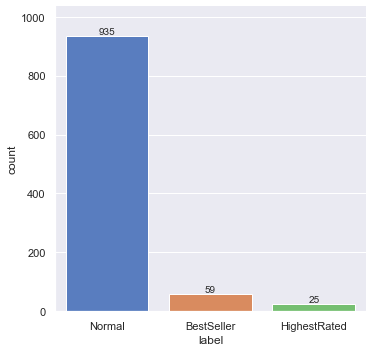

In [39]:
# distribution of labels - best seller, highest rated, normal

# categorical distribution with counts shown
ax = sns.catplot(x = 'label', palette = "muted", kind = "count", data = udemy_data)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy_data.label.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

plt.show()

### Language

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26412 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 35486 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 44397 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 50612 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3652 missing from current font.

C:\Users\whn97\Anacon

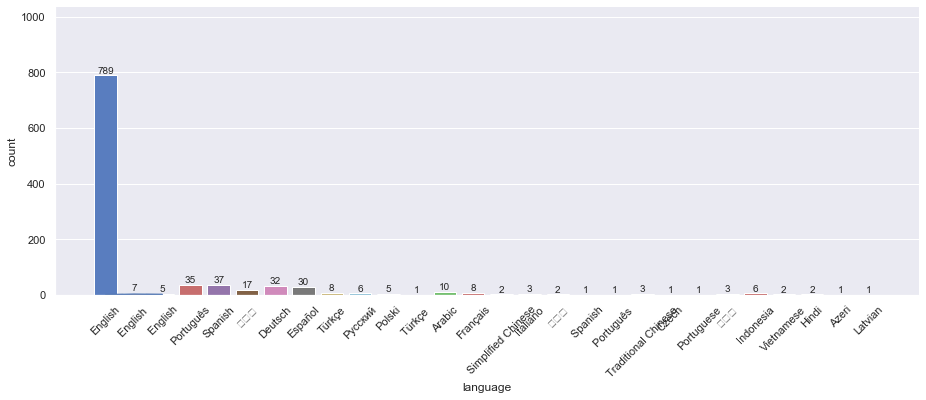

In [40]:
# distribution of language
def set_size(w,h, ax = None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


    # categorical distribution with counts shown
ax = sns.catplot(x = 'language', palette = "muted", kind = "count", data = udemy_data)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy_data.label.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

ax.plot([1,3,2])
set_size(12,4)
plt.xticks(rotation = 45)

plt.show()

### Correlation Heatmap

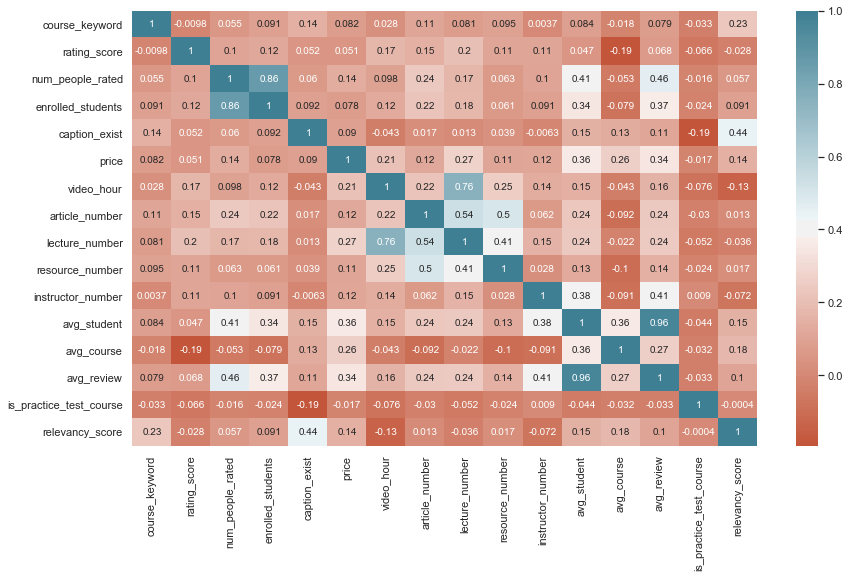

In [41]:
#checking for correlation - Heatmap
udemy_scatterplot = udemy_data[['course_keyword', 'rating_score', 'num_people_rated', 'enrolled_students', 'caption_exist', 'price', 'video_hour', 'article_number', 'lecture_number', 'resource_number', 'instructor_number', 'avg_student', 'avg_course', 'avg_review', 'is_practice_test_course', 'relevancy_score']]
udemy_cor = udemy_scatterplot.corr()
plt.subplots(figsize = (14,8))
sns.heatmap(udemy_cor, annot = True,cmap = sns.diverging_palette(20, 220, n = 200))

### Scatterplot

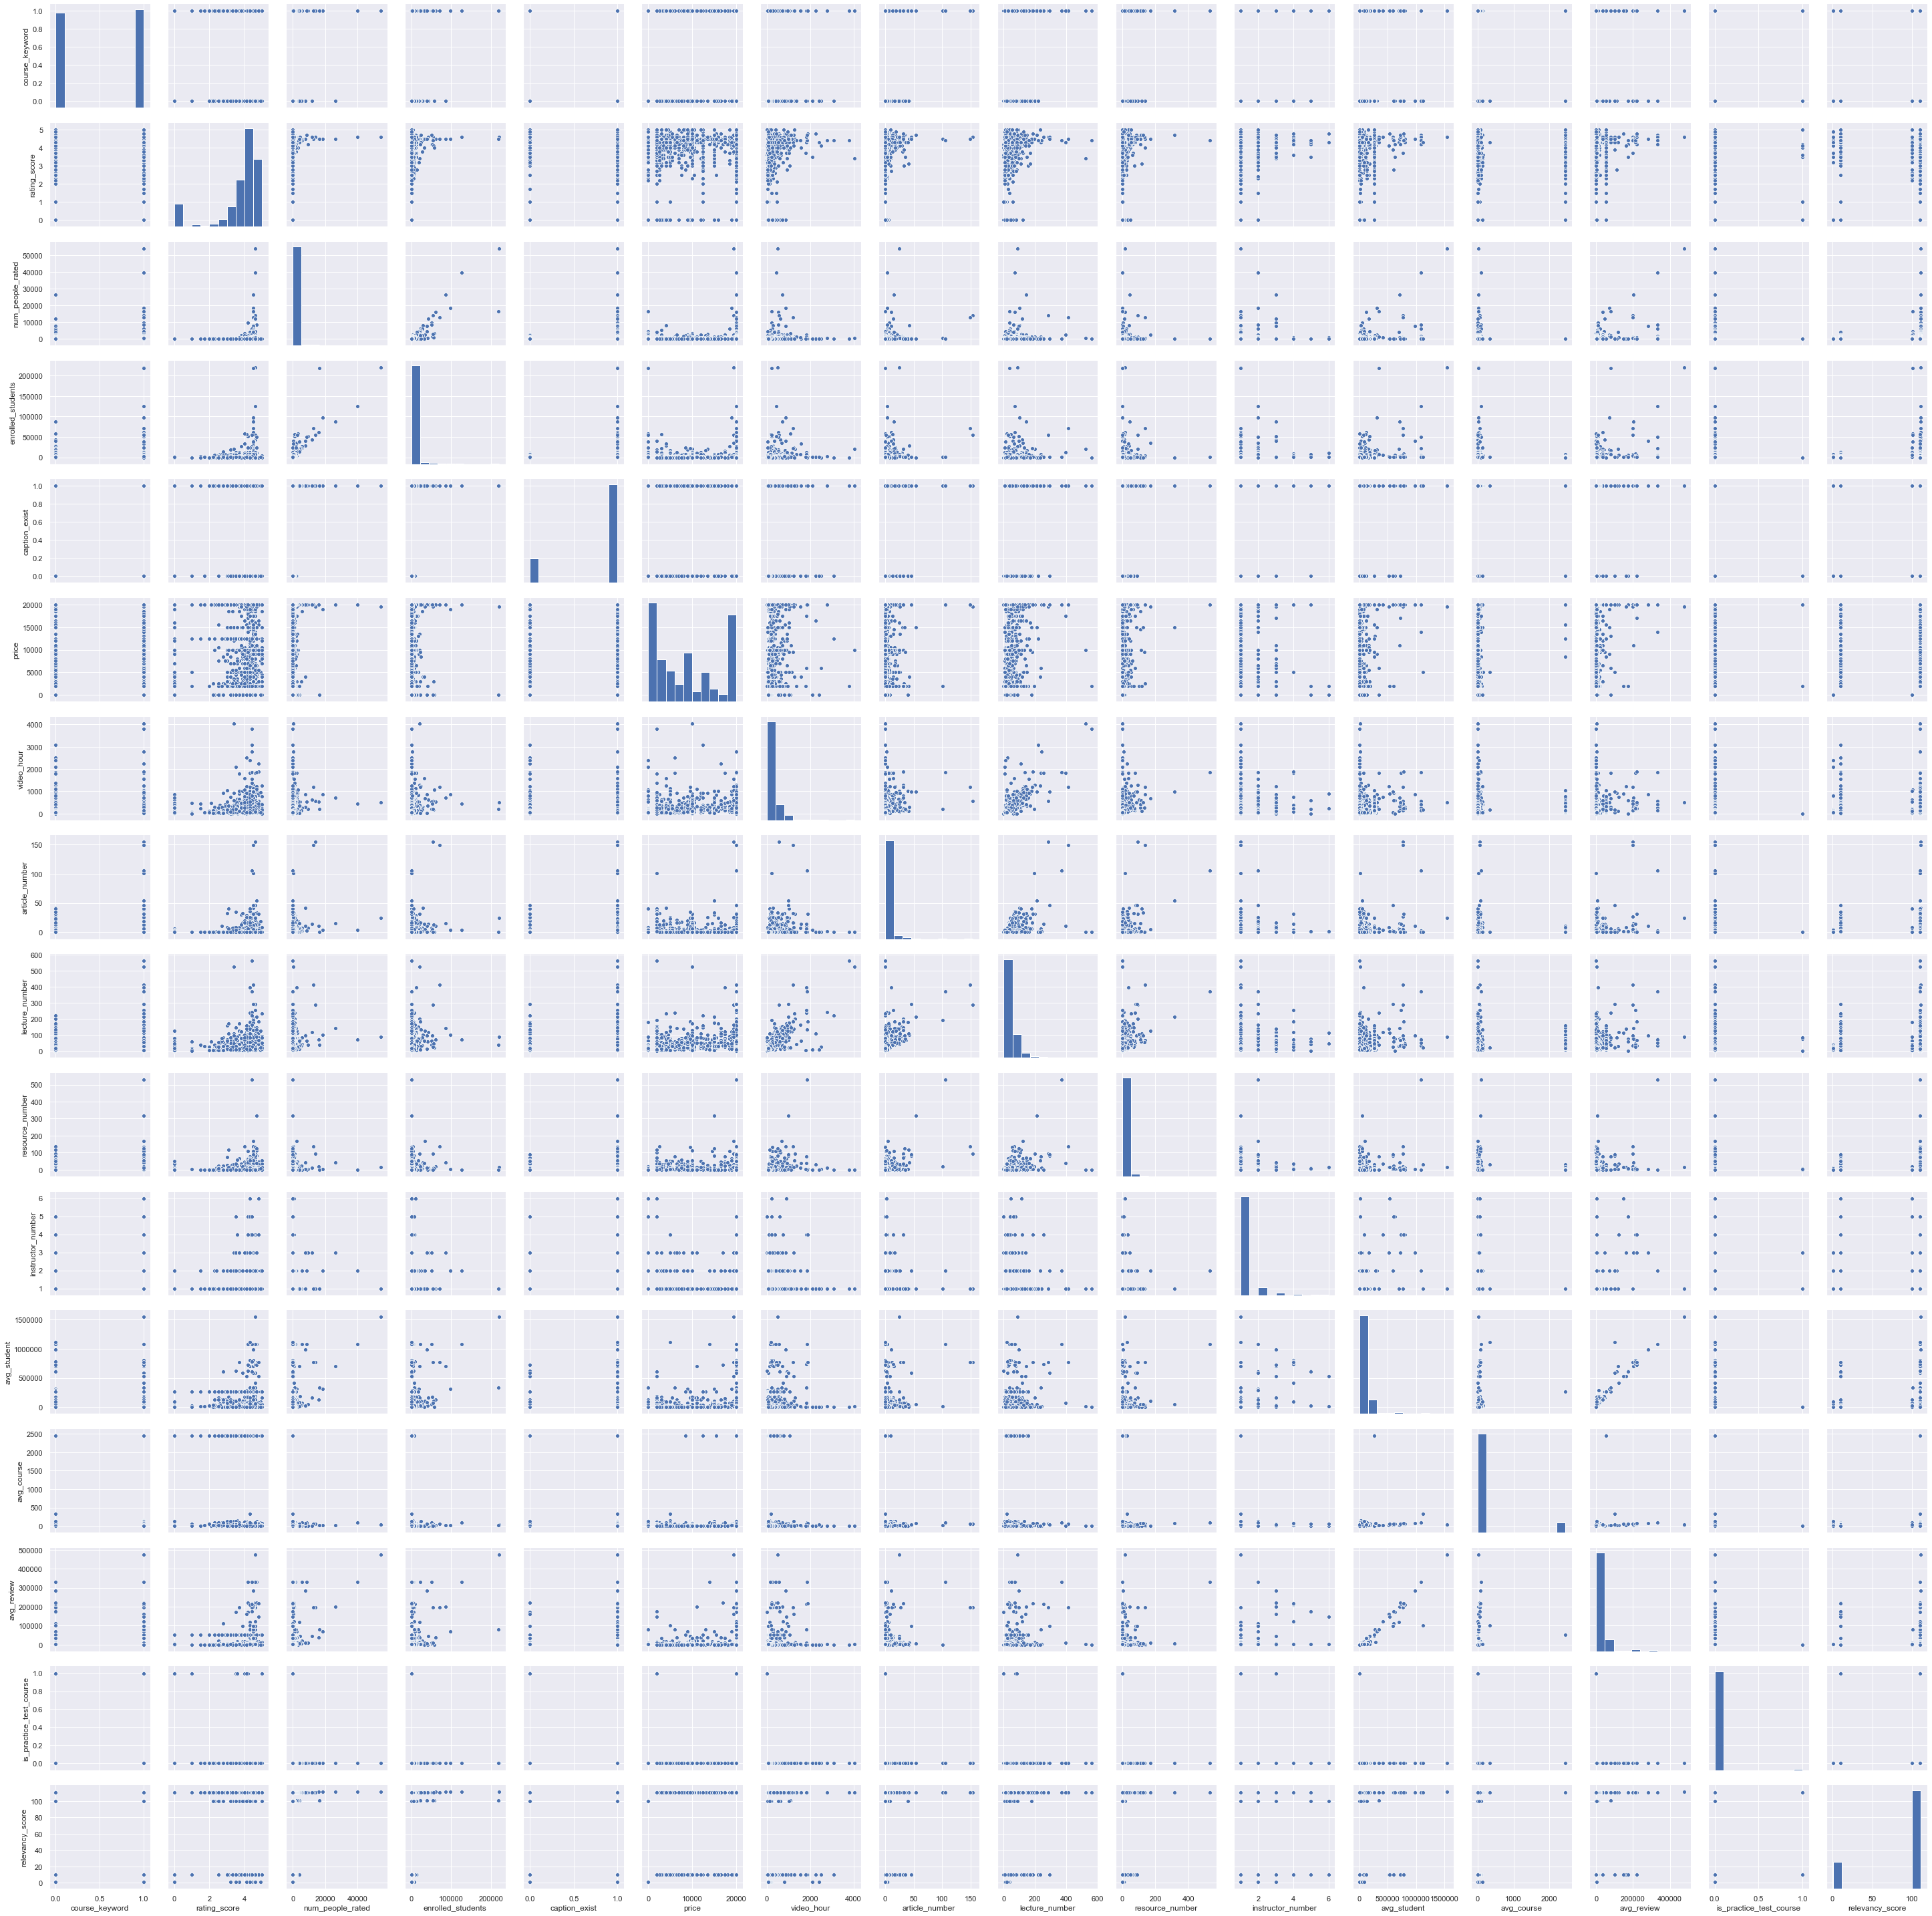

In [42]:
#scatterplot
sns.pairplot(udemy_scatterplot)

### Review Rate

In [43]:
# review rate
tem = udemy_data[['num_people_rated','enrolled_students']]
udemy_data['review_rate'] = tem['num_people_rated']/tem['enrolled_students']
# fill the nan review rate 0
udemy_data['review_rate'] = udemy_data['review_rate'].fillna(0)
print(udemy_data['review_rate'])

0       0.245214
1       0.315930
2       0.301470
3       0.187310
4       0.263847
          ...   
1014    0.019737
1015    0.034632
1016    0.025641
1017    0.027397
1018    0.000000
Name: review_rate, Length: 1019, dtype: float64


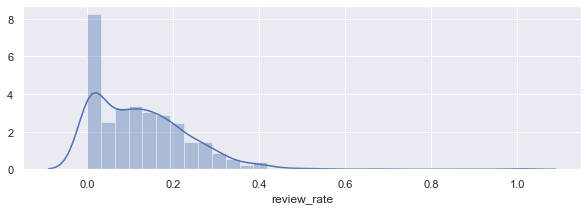

In [44]:
plt.figure(figsize = (10,3))
sns.distplot(udemy_data.review_rate)

# Part 2.Regression Model on Relevancy Score

In [45]:
# load dataset
udemy = udemy_data.copy()
udemy.head()

,course_id,relevancy_rank,course_title,course_keyword,course_url,rating_score,label,num_people_rated,enrolled_students,language,...,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,is_practice_test_course,update_date,relevancy_score,review_rate
0,762616,1,The Complete SQL Bootcamp,1,/course/the-complete-sql-bootcamp/,4.6,Normal,54078,220534,English,...,90,16,1,1543651.0,29.0,475822.0000,0,42,110.995476,0.245214
1,937678,2,Tableau 10 A-Z: Hands-On Tableau Training For ...,1,/course/tableau10/,4.6,Normal,39767,125873,English,...,70,0,2,1084119.0,87.5,331516.5000,0,42,110.981320,0.315930
2,1208634,3,Microsoft Power BI - A Complete Introduction,0,/course/powerbi-complete-introduction/,4.5,Normal,26211,86944,English,...,142,44,3,705671.0,20.0,200818.3333,0,73,110.927284,0.301470
3,996228,4,The Ultimate Hands-On Hadoop - Tame your Big D...,1,/course/the-ultimate-hands-on-hadoop-tame-your...,4.5,BestSeller,18342,97923,English,...,100,2,2,315042.0,17.0,70973.0000,0,42,110.840270,0.187310
4,751792,5,Business Analysis Fundamentals,1,/course/business-analysis-ba/,4.5,HighestRated,16153,61221,English,...,70,18,1,123999.0,14.0,36350.0000,0,42,110.801186,0.263847


In [46]:
# drop useless columns
udemy = udemy.drop('course_id', 1)
udemy = udemy.drop('relevancy_rank', 1)
udemy = udemy.drop('course_title', 1)
udemy = udemy.drop('course_url', 1)
udemy = udemy.drop('caption', 1)
udemy = udemy.drop('currency', 1)
udemy = udemy.drop('review_rate', 1)

In [47]:
# check whether null value exists
for col in udemy.columns:
    num = udemy[col].isna().sum()
    if num != 0:
        print('Null value exists.')

In [48]:
# create dummy variables
factors = ['label', 'language']
for i in range(len(udemy['language'])):
    udemy['language'][i] = udemy['language'][i].replace(' ', '')

for var in factors:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(udemy[var], prefix=var)
    udemy = pd.concat([udemy, cat_list], axis = 1)
    udemy = udemy.drop(var, 1)

In [49]:
# remove one dummy for label and language
udemy = udemy.drop('label_Normal', 1)
udemy = udemy.drop('language_한국어', 1)

In [50]:
# create X and Y dataset
X = udemy.copy()
X = X.drop('relevancy_score', 1)
Y = udemy.copy()
Y = Y['relevancy_score']
print('number of variables:', X.shape[1])

number of variables: 40


In [51]:
# standardize data
def data_preprocessing(df):
    std = preprocessing.StandardScaler()              # scale numeric columns
    scaled = std.fit_transform(df[num_cols])
    scaled = pd.DataFrame(scaled, columns=num_cols)
    df = df.drop(columns = num_cols, axis = 1)       # drop original numeric columns
    df = df.merge(scaled, left_index=True, right_index=True, how = "left")         # merge scaled numeric columns
    df.fillna(0, inplace=True)           # fill na again
    return df

# define numerical columns for preprocessing
num_cols = ["rating_score", "num_people_rated", "enrolled_students", "price", "video_hour",
            "article_number", "lecture_number", "resource_number", "instructor_number", 
            "avg_student", "avg_course", "avg_review", "update_date"]
# preprocessing
X = data_preprocessing(X)
X.head()

,course_keyword,caption_exist,is_practice_test_course,label_BestSeller,label_HighestRated,language_Arabic,language_Azeri,language_Czech,language_Deutsch,language_English,...,price,video_hour,article_number,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,update_date
0,1,1,0,0,0,0,0,0,0,1,...,1.439136,0.612131,2.027188,0.932507,0.231259,-0.295645,8.433280,-0.310346,9.838095,-0.899345
1,1,1,0,0,0,0,0,0,0,1,...,1.509355,0.445826,0.071028,0.521572,-0.377073,1.466123,5.781523,-0.228434,6.746605,-0.899345
2,0,1,0,0,0,0,0,0,0,1,...,1.509355,1.194197,1.146916,2.000937,1.295839,3.227892,3.597667,-0.322948,3.946628,-0.837784
3,1,1,0,1,0,0,0,0,0,1,...,1.368917,1.609958,0.071028,1.137974,-0.301032,1.466123,1.343519,-0.327149,1.164921,-0.899345
4,1,1,0,0,1,0,0,0,0,1,...,1.509355,0.695283,0.755684,0.521572,0.307300,-0.295645,0.241094,-0.331349,0.423184,-0.899345


In [52]:
# check the correlation between variables again
X.corr(method='spearman')

,course_keyword,caption_exist,is_practice_test_course,label_BestSeller,label_HighestRated,language_Arabic,language_Azeri,language_Czech,language_Deutsch,language_English,...,price,video_hour,article_number,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,update_date
course_keyword,1.000000,0.141689,-0.033045,0.025280,0.029076,-0.041488,0.030823,0.030823,-0.036770,0.228898,...,0.079620,0.018915,0.092658,0.026863,0.026243,-0.002766,0.130633,0.120695,0.108448,0.004583
caption_exist,0.141689,1.000000,-0.191024,0.027294,-0.001489,-0.201457,-0.063424,-0.063424,-0.336036,0.441124,...,0.079041,0.008381,0.046775,0.016784,-0.022574,-0.017686,0.286316,0.211091,0.267624,0.031447
is_practice_test_course,-0.033045,-0.191024,1.000000,-0.023402,-0.014971,-0.009398,-0.002959,-0.002959,-0.016997,-0.001908,...,-0.029697,-0.162271,-0.074248,-0.099422,0.000923,0.002606,-0.095836,-0.047324,-0.076522,-0.053536
label_BestSeller,0.025280,0.027294,-0.023402,1.000000,-0.039316,-0.024680,-0.007770,-0.007770,0.003546,0.037114,...,0.156928,0.180009,0.217030,0.203853,0.028613,0.113596,0.155379,0.040071,0.199589,-0.170980
label_HighestRated,0.029076,-0.001489,-0.014971,-0.039316,1.000000,-0.015788,-0.004971,-0.004971,0.080563,-0.056487,...,0.018037,0.062500,0.044383,0.043858,0.052322,0.044511,0.002416,-0.032209,0.014327,-0.000810
language_Arabic,-0.041488,-0.201457,-0.009398,-0.024680,-0.015788,1.000000,-0.003120,-0.003120,-0.017925,-0.190828,...,-0.013318,0.053884,-0.026298,0.046066,0.022065,-0.004008,-0.108502,-0.088461,-0.103834,-0.030434
language_Azeri,0.030823,-0.063424,-0.002959,-0.007770,-0.004971,-0.003120,1.000000,-0.000982,-0.005643,-0.060078,...,-0.036828,-0.029261,-0.024652,-0.046780,-0.040004,-0.010941,-0.051007,-0.044361,-0.051862,-0.004377
language_Czech,0.030823,-0.063424,-0.002959,-0.007770,-0.004971,-0.003120,-0.000982,1.000000,-0.005643,-0.060078,...,-0.024373,-0.019436,0.052912,0.009697,0.000703,-0.010941,-0.045837,-0.032991,-0.043867,-0.009448
language_Deutsch,-0.036770,-0.336036,-0.016997,0.003546,0.080563,-0.017925,-0.005643,-0.005643,1.000000,-0.345147,...,0.033107,0.042324,0.045143,0.002717,0.076186,0.095244,-0.075030,-0.001802,-0.066458,-0.070273
language_English,0.228898,0.441124,-0.001908,0.037114,-0.056487,-0.190828,-0.060078,-0.060078,-0.345147,1.000000,...,0.115818,-0.132569,0.017950,-0.041190,-0.111507,-0.099505,0.287801,0.224094,0.218309,0.158138


C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3652 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3607 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3618 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26412 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 35486 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 3652 missing from current font.

C:\Users\whn97\Anaconda3

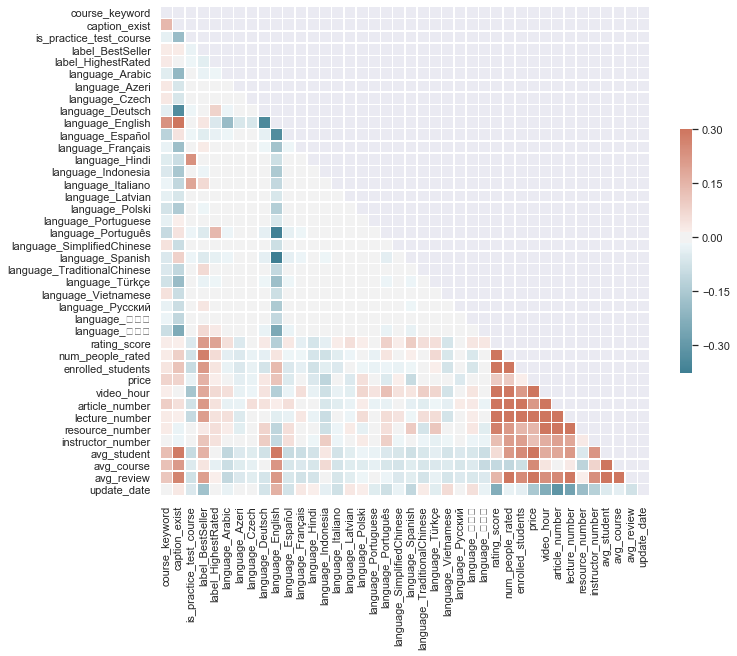

In [53]:
# Compute the correlation matrix
corr = X.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
# randomly split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 31)

## Basic linear regression

In [55]:
# establish simple linear regression model 
lm = LinearRegression()
lm.fit(x_train, y_train)
lm_predictions = lm.predict(x_test)
lm_r2 = r2_score(y_test, lm_predictions)
coeff = lm.coef_
print('number of feature used:', coeff.shape[0])
print('R-square:', lm_r2)

number of feature used: 40
R-square: 0.9961785834928063


In [56]:
# use 5-fold cross validation to fit the linear regression model
cv_predictions = cross_val_predict(lm, x_test, y_test, cv=5)
cv_r2 = r2_score(y_test, cv_predictions)
print('R-square:', cv_r2)

R-square: 0.9972537477917589


## Lasso regression

In [57]:
# test best value of alpha ranging from 1e-15 to 20
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-14, 1e-13, 1e-12, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor.fit(x_train, y_train)

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.7048363312956, tolerance: 28.3697079399619

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.1073597466546, tolerance: 24.1190904205206

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.2983763923894, tolerance: 26.2275946868735

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.2983932693396, tolerance

C:\Users\whn97\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.36474980920127, tolerance: 27.05673121245677



GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-14, 1e-13, 1e-12, 1e-10, 1e-08,
                                   0.0001, 0.001, 0.01, 1, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
# find the best alpha
lasso_regressor.best_params_

{'alpha': 0.01}

In [59]:
# test best value of alpha ranging from 0.001 to 1
lasso = Lasso()
parameters = {'alpha': np.arange(0.001, 1, 0.001)}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.01...
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
# find the best alpha
lasso_regressor.best_params_

{'alpha': 0.012}

In [61]:
# print number of feature used
coeff_used = np.sum(lasso_regressor.best_estimator_.coef_!=0)
print('number of feature used:', coeff_used)

number of feature used: 22


In [62]:
# show coefficients of all variables
result = lasso_regressor.best_estimator_.coef_
select_var = {'variable': X.columns, 'coef': result}
select_var = pd.DataFrame(select_var)
print(select_var)

                       variable       coef
0                course_keyword   0.320193
1                 caption_exist   0.478604
2       is_practice_test_course   0.981423
3              label_BestSeller   0.656204
4            label_HighestRated   0.395580
5               language_Arabic  -0.000000
6                language_Azeri   0.000000
7                language_Czech   0.000000
8              language_Deutsch  -0.000000
9              language_English  99.373439
10             language_Español  -0.216399
11            language_Français   0.000000
12               language_Hindi   0.000000
13           language_Indonesia  -4.877001
14            language_Italiano   0.000000
15             language_Latvian   0.000000
16              language_Polski  -0.000000
17          language_Portuguese   0.000000
18           language_Português  -0.000000
19   language_SimplifiedChinese   0.000000
20             language_Spanish   0.221648
21  language_TraditionalChinese  -3.890132
22         

In [63]:
# show selected variables
select_var[select_var['coef'] != 0]

,variable,coef
0,course_keyword,0.320193
1,caption_exist,0.478604
2,is_practice_test_course,0.981423
3,label_BestSeller,0.656204
4,label_HighestRated,0.395580
9,language_English,99.373439
10,language_Español,-0.216399
13,language_Indonesia,-4.877001
20,language_Spanish,0.221648
21,language_TraditionalChinese,-3.890132


In [64]:
# print train score and test score
train_score = lasso_regressor.score(x_train,y_train)
test_score = lasso_regressor.score(x_test, y_test)
print('train score:', train_score)
print('test score:', test_score) # OOS r-square

train score: 0.996739193501703
test score: 0.9968498746208044


In [65]:
# print oos r-square
lasso_predictions = lasso_regressor.predict(x_test)
r2_lasso = r2_score(y_test, lasso_predictions)
print('OOS R-square:', r2_lasso)

OOS R-square: 0.9968498746208044


## Test multicollinearity

In [66]:
# all variables selected by lasso
X_lasso = X.copy()
factor_new = np.array(select_var[select_var['coef'] == 0]['variable'])
for var in factor_new:
    X_lasso = X_lasso.drop(var, 1)

In [67]:
# gather features
features = "+".join(X_lasso.columns)

# get y and x dataframes based on this regression:
y, x = dmatrices('relevancy_score ~' + features, udemy, return_type='dataframe')

In [68]:
# For each x, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif = vif.drop(0, 0)
vif

,VIF Factor,features
1,1.094675,course_keyword
2,1.621560,caption_exist
3,1.067154,is_practice_test_course
4,1.132026,label_BestSeller
5,1.040200,label_HighestRated
6,2.251923,language_English
7,1.325196,language_Español
8,1.061088,language_Indonesia
9,1.437134,language_Spanish
10,1.117248,language_TraditionalChinese


According to the VIF table, multicollinearity doesn't exist. Thus we believe that our result is reliable.

## Use information criteria to select the best model(AIC, BIC, AICc)
Compare two models: basic linear model and lasso regression model

In [69]:
# define the function for aic, aicc and bic
def AIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + 2*coeff_used

def AICc(y_true, y_hat, coeff_used):
    n = len(y_hat)
    return AIC(y_true, y_hat, coeff_used) + 2*coeff_used*(coeff_used+1)/(n-coeff_used-1)

def BIC(y_true, y_hat, coeff_used):
    resid = y_true - y_hat
    sse = sum(resid**2)
    n = len(y_hat)
    return n*np.log(sse/n) + np.log(n)*coeff_used

In [70]:
# basic linear model
aic_lm = AIC(y_test, lm_predictions, (len(x_test.columns)+1))
print('AIC:', aic_lm.round(1))
aicc_lm = AICc(y_test, lm_predictions, (len(x_test.columns)+1))
print('AICc:', aicc_lm.round(1))
bic_lm = BIC(y_test, lm_predictions, (len(x_test.columns)+1))
print('BIC:', bic_lm.round(1))

AIC: 1608.2
AICc: 1612.6
BIC: 1801.0


In [71]:
# lasso regression model
aic_lasso = AIC(y_test, lasso_predictions, (coeff_used+1))
print('AIC:', aic_lasso.round(1))
aicc_lasso = AICc(y_test, lasso_predictions, (coeff_used+1))
print('AICc:', aicc_lasso.round(1))
bic_lasso = BIC(y_test, lasso_predictions, (coeff_used+1))
print('BIC:', bic_lasso.round(1))

AIC: 1414.5
AICc: 1415.9
BIC: 1522.7


Obviously, lasso regression model is better.

# Part 3.Multinomial Logistic Regression

In [72]:
udemy = udemy_data.copy()
udemy = udemy.drop('review_rate', 1)

## Will the imbalance be an issue?

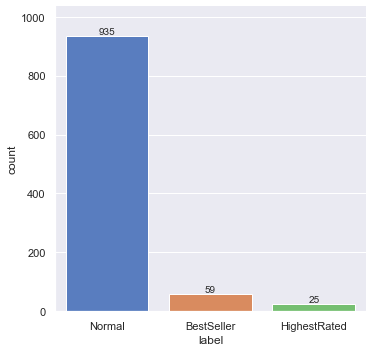

In [73]:
# distribution of labels - best seller, highest rated, normal

# categorical distribution with counts shown
ax = sns.catplot(x = 'label', palette = "muted", kind = "count", data = udemy)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy.label.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

plt.show()

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26085 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 26412 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 35486 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 54620 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 44397 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 50612 missing from current font.

C:\Users\whn97\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 3652 missing from current font.

C:\Users\whn97\Anacon

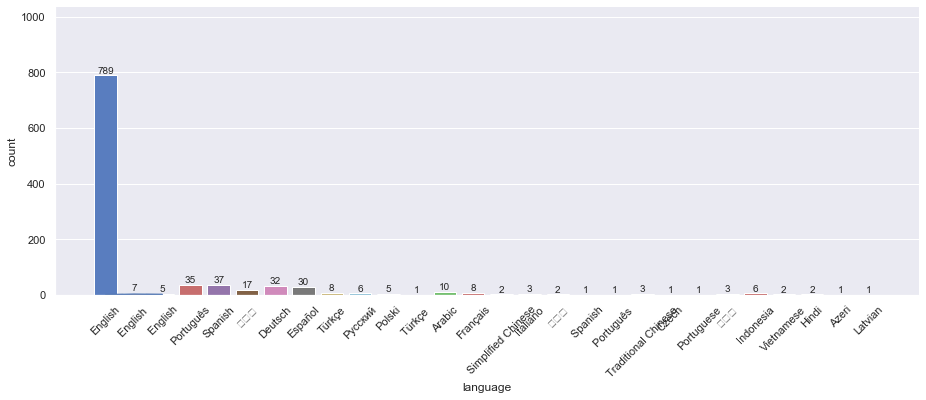

In [74]:
# distribution of languages

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


    # categorical distribution with counts shown
ax = sns.catplot(x = 'language', palette = "muted", kind = "count", data = udemy)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = udemy.label.value_counts().max()
ax.set_ylim([0, y_max+100])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            ha = 'center', va = 'bottom')

ax.plot([1,3,2])
set_size(12,4)
plt.xticks(rotation = 45)

plt.show()

In [75]:
# define preprocessing function
def data_preprocessing(df):
#     df.fillna(0, inplace=True)          # fillna
    le = preprocessing.LabelEncoder()                 # transform binary into dummies
    for i in binary_cols :
        df[i] = le.fit_transform(df[i])
    df = pd.get_dummies(data = df, columns = cat_cols)
    std = preprocessing.StandardScaler()              # scale numeric columns
    scaled = std.fit_transform(df[num_cols])
    scaled = pd.DataFrame(scaled,columns=num_cols)
    df = df.drop(columns = num_cols, axis = 1)       # drop original numeric columns
    df = df.merge(scaled, left_index = True, right_index = True, how = "left")         # merge scaled numeric columns
    df.fillna(0, inplace = True)           # fill na again for new dummies

    return df

In [76]:
# transform 'language' to 'english'
udemy['english'] = udemy.language.apply(lambda x: 1 if x == 'English' else 0)
udemy.drop('language', axis = 1, inplace = True)
udemy.head(2)

,course_id,relevancy_rank,course_title,course_keyword,course_url,rating_score,label,num_people_rated,enrolled_students,caption,...,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,is_practice_test_course,update_date,relevancy_score,english
0,762616,1,The Complete SQL Bootcamp,1,/course/the-complete-sql-bootcamp/,4.6,Normal,54078,220534,"English [Auto-generated], French [Auto-generat...",...,90,16,1,1543651.0,29.0,475822.0,0,42,110.995476,1
1,937678,2,Tableau 10 A-Z: Hands-On Tableau Training For ...,1,/course/tableau10/,4.6,Normal,39767,125873,"English, French [Auto-generated],5 more",...,70,0,2,1084119.0,87.5,331516.5,0,42,110.981320,1


In [77]:
# define categorical, binary, numerical, and target columns for preprocessing
cat_cols = ["label"]
binary_cols = ["course_keyword", "caption_exist", "english", "is_practice_test_course"]
num_cols = ["rating_score", "num_people_rated", "enrolled_students", "price", "video_hour",
            "article_number", "lecture_number", "resource_number", "instructor_number", 
            "avg_student", "avg_course", "avg_review", "relevancy_score"
           ]
# for regression
target_col = ['relevancy_score'] 

In [78]:
# processing data
udemy_processed = data_preprocessing(udemy)
udemy_processed.head()

,course_id,relevancy_rank,course_title,course_keyword,course_url,caption,caption_exist,currency,is_practice_test_course,update_date,...,price,video_hour,article_number,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,relevancy_score
0,762616,1,The Complete SQL Bootcamp,1,/course/the-complete-sql-bootcamp/,"English [Auto-generated], French [Auto-generat...",1,Cents,0,42,...,1.439136,0.612131,2.027188,0.932507,0.231259,-0.295645,8.433280,-0.310346,9.838095,0.560872
1,937678,2,Tableau 10 A-Z: Hands-On Tableau Training For ...,1,/course/tableau10/,"English, French [Auto-generated],5 more",1,Cents,0,42,...,1.509355,0.445826,0.071028,0.521572,-0.377073,1.466123,5.781523,-0.228434,6.746605,0.560527
2,1208634,3,Microsoft Power BI - A Complete Introduction,0,/course/powerbi-complete-introduction/,"English,French [Auto-generated],3 moreGerman [...",1,Cents,0,73,...,1.509355,1.194197,1.146916,2.000937,1.295839,3.227892,3.597667,-0.322948,3.946628,0.559212
3,996228,4,The Ultimate Hands-On Hadoop - Tame your Big D...,1,/course/the-ultimate-hands-on-hadoop-tame-your...,"English,Portuguese [Auto-generated],1 moreSpan...",1,Cents,0,42,...,1.368917,1.609958,0.071028,1.137974,-0.301032,1.466123,1.343519,-0.327149,1.164921,0.557094
4,751792,5,Business Analysis Fundamentals,1,/course/business-analysis-ba/,"English,French [Auto-generated],7 moreGerman [...",1,Cents,0,42,...,1.509355,0.695283,0.755684,0.521572,0.307300,-0.295645,0.241094,-0.331349,0.423184,0.556142


## Multinomial Regression

In [79]:
# define function about spliting data
def split_data(df, target_col):
    X = df[[i for i in df.columns if i not in target_col]]
    y = df[target_col]
    return train_test_split(X, y, test_size = 0.25, random_state = 123)

In [80]:
# vif to narrow down variables based on multicollinearity
def vif_var(X_train):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["features"] = X_train.columns
    selected_var = vif[vif["VIF Factor"] < 10]["features"].unique().tolist()

    return selected_var

In [81]:
# split train and test data
X_train, X_test, y_train, y_test = split_data(udemy, 'label')

In [82]:
X_train

,course_id,relevancy_rank,course_title,course_keyword,course_url,rating_score,num_people_rated,enrolled_students,caption,caption_exist,...,lecture_number,resource_number,instructor_number,avg_student,avg_course,avg_review,is_practice_test_course,update_date,relevancy_score,english
151,1846756,152,Introduction to Blockchain with Industry Appli...,0,/course/blockchain-introduction/,4.2,205,837,English [Auto-generated],1,...,49,1,2,1.084119e+06,87.500000,331516.5000,0,379,110.020294,1
261,1428686,262,The Ultimate BPM and BPMN 2.0 Course,0,/course/the-ultimate-bpm-and-bpmn-2-0-course/,3.2,68,420,English [Auto-generated],1,...,25,4,1,5.160000e+02,3.000000,79.0000,0,803,110.006775,1
650,2696586,651,PowerBI Zero to Hero - Introduction to PowerBI...,0,/course/powerbi-zero-to-hero-introduction-to-p...,5.0,2,54,No caption,0,...,17,4,1,6.300000e+01,1.000000,4.0000,0,73,110.000100,1
11,1594488,12,Blockchain A-Z™: Learn How To Build Your First...,0,/course/build-your-blockchain-az/,4.5,7551,39559,"English [Auto-generated],French [Auto-generate...",1,...,97,3,3,9.851553e+05,78.333333,283150.6667,0,42,110.530200,1
946,2497734,947,De Excel a Tableau en menos de 1 hora!!,0,/course/de-excel-a-tableau-en-menos-de-1-hora/,4.3,5,303,Español [Generados automáticamente],1,...,10,3,1,5.710000e+02,5.000000,47.0000,0,226,10.000500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2810337,989,Professionelle Berichtserstellung - Cognos Ana...,1,/course/professionelle-berichtserstellung-cogn...,0.0,0,1,No caption,0,...,30,1,1,3.000000e+00,3.000000,0.0000,0,42,10.000000,0
322,1597114,323,Excel 2016: Macros and Advanced Queries,0,/course/excel-2016-macros-and-advanced-queries/,4.2,41,513,English,1,...,10,0,1,1.072100e+04,12.000000,324.0000,0,257,110.004090,1
382,546926,383,Essential Analytics for Solo and Small Busines...,1,/course/essential-analytics-for-solo-and-small...,4.7,25,221,English [Auto-generated],1,...,59,16,1,2.210000e+02,1.000000,25.0000,0,1595,110.002495,1
365,2554305,366,Employee Attrition: HR Analytics in Practice,1,/course/employee-attrition-hr-analytics-in-pra...,4.0,28,156,English,1,...,35,3,3,2.857333e+03,3.000000,48.0000,0,73,110.002800,1


In [83]:
# delete useless variables
X_train = X_train.drop('course_id', 1)
X_train = X_train.drop('course_title', 1)
X_train = X_train.drop('course_url', 1)
X_train = X_train.drop('caption', 1)
X_train = X_train.drop('currency', 1)
X_test = X_test.drop('course_id', 1)
X_test = X_test.drop('course_title', 1)
X_test = X_test.drop('course_url', 1)
X_test = X_test.drop('caption', 1)
X_test = X_test.drop('currency', 1)

In [84]:
# standardize data
scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
x_test = scaler.transform(X_test)

In [85]:
# multinomial regression
clf = LogisticRegression(random_state = 0, multi_class = 'multinomial', solver = 'newton-cg')
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [86]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = y_train.unique().tolist())
cm

array([[232,   2,   0],
       [ 15,   0,   0],
       [  6,   0,   0]], dtype=int64)

In [87]:
# define function about testing accuracy
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [88]:
# accuracy of multinomial logistic regression
accuracy(cm)

0.9098039215686274

Accuracy of the multinomial logistic regression model about predicting label is about 0.91, which is high enough to prove that our model works.